# Homework 1 
### Tristan Larkin 
**Collaborators:** Althea Denlinger, Andrew, Andrew, Alex, Jack, Erin, Chat GPT \
Due: End of Day Feb 10 (Friday), 2022 \
All problems are 10 points unless otherwise noted.

`NOTE: There is actual source code here but only for testing and printing outputs, it should not be required to understand the solutions and the grader can ignore it entirely. THAT SAID please do not ignore code outputs, which often times do contain parts of solutions.`

***
## Problem 1
Suppose that you have an n-story building and there exists a particular floor level (say level x),
such that when an egg is thrown off at level x or higher, it will break, and intact otherwise.
You may also assume that the building is equipped with an elevator that can go from any floor
to another floor in unit time no matter how many levels are between the starting level and the
target level. Design a strategy to find the value of x as quickly as possible with the following
resource provisioning: 

    - You are only given 1 egg.
    - You are given 2 eggs.
    - You are given 3 eggs.
    - You are given log_2 n eggs.
    - Can you explain the relations between the solutions of 2,3,4,...,log_2 n eggs?

The one egg problem is trivial, since we don't have any information on the building and we cannot break the egg we have to start at the lowest level and drop the egg, then go to the next level and repeat.\
\
If we have two eggs then we want to use the first egg to get as much information as possible. We would start by dropping it at the halfway mark. If it breaks we go to the lowest level and will find the height before it reaches the halfway mark. If the first egg does not break then we want to go to the halfway point between the first time we dropped and the highest floor and try again. We repeat this pattern. \
\
It is essentailly getting a limited number of binary search steps, then changing to linear search. With any number of eggs we would binary search until we only have one egg left, then cover the rest of the floors via linear search from lowest to highest. If we make a recursion it would have to have two inputs, the number of levels and the number of eggs. The base cases are $T(n, 1) = n$ and $T(1, e) = 1$. In the worst case the egg breaks every time and the recursion is $T(n,e) = T(\frac{n}{2}, e - 1) + 1$. Lets apply the recursion for the cases above:
$$ T(n, 1) = n $$
$$ T(n, 2) = T(\frac{n}{2}, 1) + 1 = \frac{n}{2} + 1 $$
$$ T(n, 3) = T(\frac{n}{2}, 2) + 1 =  \frac{n}{4} + 1 + 1 $$
$$ T(n, \log_2{n}) = T(\frac{n}{2}, \log_2{n} - 1) + 1 = T(1, 1) + log_2{n} $$
This pattern looks like each aditional starting egg cuts the time in half plus one. If you have $log_2{n}$ or more eggs then you will get to just perform binary search in $O(n\log{n})$, coming from the $+ 1\text{s}$ since our tree has a height of $log_2{n}$.

***
## Problem 2
(Geometric Sequence) Consider a number n with the prime factorization as $2^{10}$. List all the
factors of n, and calculate the sum of all the factors. \
What if $n = 2^{10}3^{10}$, can you find a way to
systematically list all the factors of n and calculate the sum of all the factors?

All the factors of $2^{10}$ will just be 
$2^{0}$, $2^{1}$, $2^{2}$, $2^{3}$, $2^{4}$, $2^{5}$, $2^{6}$, $2^{7}$, $2^{8}$, $2^{9}$, $2^{10}$, Which is a geometric series.\
The sum will be given by:
$$ S_n = \sum_{i=0}^{10} 2^i = 2^{n-1} - 1 $$
This can be shown by the following:
$$ S_n = r^0 + r^1 + r^2 + ... + r^{n-1} + r^{n} $$
$$ rS_n = r^1 + r^2 + r^3 ... + r^{n} + r^{n+1} = S_{n+1} - 1 $$
$$ rS_n - r^{n+1} = S_{n+1} - r^{n+1} - 1 = S_n - 1 $$
$$ rS_n - S_n = r^{n+1} - 1 $$
$$ S_n = \frac{r^{n+1} - 1}{r - 1} $$
$$ r = 2 \Rightarrow S_n = \frac{2^{n+1} - 1}{2 - 1} = 2^{n+1} - 1 $$

In [45]:
print(f"The sum of the factors of 2^10 = {2**(10 + 1) - 1}.")

The sum of the factors of 2^10 = 2047.


If the number is $2^{10}3^{10}$ then the factorization is every combination of of $2^n$ and $3^m$ where $ m \And n \in [0..10] $.

$3^{0} 2^{0}$   $3^{0} 2^{1}$   $3^{0} 2^{2}$   $3^{0} 2^{3}$   $3^{0} 2^{4}$   $3^{0} 2^{5}$   $3^{0} 2^{6}$   $3^{0} 2^{7}$   $3^{0} 2^{8}$   $3^{0} 2^{9}$   $3^{0} 2^{10}$\
$3^{1} 2^{0}$   $3^{1} 2^{1}$   $3^{1} 2^{2}$   $3^{1} 2^{3}$   $3^{1} 2^{4}$   $3^{1} 2^{5}$   $3^{1} 2^{6}$   $3^{1} 2^{7}$   $3^{1} 2^{8}$   $3^{1} 2^{9}$   $3^{1} 2^{10}$\
$3^{2} 2^{0}$   $3^{2} 2^{1}$   $3^{2} 2^{2}$   $3^{2} 2^{3}$   $3^{2} 2^{4}$   $3^{2} 2^{5}$   $3^{2} 2^{6}$   $3^{2} 2^{7}$   $3^{2} 2^{8}$   $3^{2} 2^{9}$   $3^{2} 2^{10}$\
$3^{3} 2^{0}$   $3^{3} 2^{1}$   $3^{3} 2^{2}$   $3^{3} 2^{3}$   $3^{3} 2^{4}$   $3^{3} 2^{5}$   $3^{3} 2^{6}$   $3^{3} 2^{7}$   $3^{3} 2^{8}$   $3^{3} 2^{9}$   $3^{3} 2^{10}$\
$3^{4} 2^{0}$   $3^{4} 2^{1}$   $3^{4} 2^{2}$   $3^{4} 2^{3}$   $3^{4} 2^{4}$   $3^{4} 2^{5}$   $3^{4} 2^{6}$   $3^{4} 2^{7}$   $3^{4} 2^{8}$   $3^{4} 2^{9}$   $3^{4} 2^{10}$\
$3^{5} 2^{0}$   $3^{5} 2^{1}$   $3^{5} 2^{2}$   $3^{5} 2^{3}$   $3^{5} 2^{4}$   $3^{5} 2^{5}$   $3^{5} 2^{6}$   $3^{5} 2^{7}$   $3^{5} 2^{8}$   $3^{5} 2^{9}$   $3^{5} 2^{10}$\
$3^{6} 2^{0}$   $3^{6} 2^{1}$   $3^{6} 2^{2}$   $3^{6} 2^{3}$   $3^{6} 2^{4}$   $3^{6} 2^{5}$   $3^{6} 2^{6}$   $3^{6} 2^{7}$   $3^{6} 2^{8}$   $3^{6} 2^{9}$   $3^{6} 2^{10}$\
$3^{7} 2^{0}$   $3^{7} 2^{1}$   $3^{7} 2^{2}$   $3^{7} 2^{3}$   $3^{7} 2^{4}$   $3^{7} 2^{5}$   $3^{7} 2^{6}$   $3^{7} 2^{7}$   $3^{7} 2^{8}$   $3^{7} 2^{9}$   $3^{7} 2^{10}$\
$3^{8} 2^{0}$   $3^{8} 2^{1}$   $3^{8} 2^{2}$   $3^{8} 2^{3}$   $3^{8} 2^{4}$   $3^{8} 2^{5}$   $3^{8} 2^{6}$   $3^{8} 2^{7}$   $3^{8} 2^{8}$   $3^{8} 2^{9}$   $3^{8} 2^{10}$\
$3^{9} 2^{0}$   $3^{9} 2^{1}$   $3^{9} 2^{2}$   $3^{9} 2^{3}$   $3^{9} 2^{4}$   $3^{9} 2^{5}$   $3^{9} 2^{6}$   $3^{9} 2^{7}$   $3^{9} 2^{8}$   $3^{9} 2^{9}$   $3^{9} 2^{10}$\
$3^{10} 2^{0}$  $3^{10} 2^{1}$  $3^{10} 2^{2}$  $3^{10} 2^{3}$  $3^{10} 2^{4}$  $3^{10} 2^{5}$  $3^{10} 2^{6}$  $3^{10} 2^{7}$  $3^{10} 2^{8}$  $3^{10} 2^{9}$  $3^{10} 2^{10}$
--------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  --------------  ---------------

The sum of this is just the sum of the $2^{10}$ factors times the sum of the $3^{10}$ factors.
$$ S = \sum_{i=0}^{10} 3^i \sum_{j=0}^{10} 2^j$$
Since these sums are independant of eachother we can evaluate them separately:
$$ S = \frac{3^{10+1} - 1}{3 - 1} * \frac{2^{10+1} - 1}{2 - 1} $$
$$ S = \frac{3^{11} - 1}{2} * \frac{2^{11} - 1}{1} $$
$$ S = \frac{3^{11}2^{11} - 3^{11} - 2^{11} + 1}{2} $$

In [62]:
print(f"The sum of all the factors of 2^10 * 3^10 is {int((3**11 * 2**11 - 3**11 - 2**11 + 1)/2)}.")

The sum of all the factors of 2^10 * 3^10 is 181308931.


Generalizing this system we can see that for $i$ factor-exponent pairs ($\prod_{q=1}^i{n_q^{r_q}}$) we can list the sets of numbers 
$$\{\{n_1^0, n_1^1, ..., n_1^{r_1}\}, \{n_2^0, n_2^1, ..., n_2^{r_2}\}, ..., \{n_i^0, n_i^1, ..., n_i^{r_i}\}\}$$
And multiple each set like a multiplication to get all the factors, this will take $O(\prod_{q=0}^{i} r_q)$ time because that is the number of terms we have to find.\
We could then sum all these factors, but we have a much faster way; using the formula for the geometric series.
$$ \prod_{q=1}^i{\frac{r_q^{n_q+1} - 1}{r_q - 1}} $$
Which should just be $O(i)$ time. Which was used in the determining of the sum of fators for $2^{10}3^{10}$ above.

***
## Problem 3
(Recursion) In computational geometry, an arrangement of lines is the partition of the plane
formed by a collection of lines. Observe that the lines partition the plane into disjoint regions.
Calculate the maximum number of disjoint regions in an arrangement created by n lines. \
(Hint: The problem should be solved recursively.)

    - A single line will partition the plane into 2 region.
    - 2 lines can partition the plane into 4 regions.
    - 3 lines can partition the plane into a maximum of 7 regions.
    - ···

Since any new line that is introduced will always be able to cross every existing line, when the $n^{\text{th}}$ line is placed there will be $n - 1$ new intersections. We can also think about out line as a series of partial lines that connect to eachother at intersections. There will be two partial lines that have one endpoint at infinity and one endpoint at an intersection, and all the other lines will have two endpoints at intersections. In this case we have $n$ new partial lines (one more than the number of new intersections we have). Each partial line will cut a preexisting region into two regions, adding one region per partial line. \
\
To condense this down we can say that $n$ new regions are added when the $n^{\text{th}}$ line is placed. So the number of regions is given by: 
$$ R(n) = R(n - 1) + n $$
We can manually do some runs to test it. We know that $R(0) = 1$ and can go from there:
$$ R(1) = R(0) + 1 = 1 + 1 = 2 $$
$$ R(2) = R(1) + 1 = 2 + 2 = 4 $$
$$ R(3) = R(2) + 1 = 4 + 3 = 7 $$
These match the known values.\
\
If we want an algebraic expression for this number $R(n)$ then we have to take a look at the recurrence.
$$ R(n) $$
$$ = R(n - 1) + n $$
$$ = R(n - 2) + (n - 1) + n  $$
$$ = R(0) + 1 + ... + (n - 1) + n $$
$$ = 1 + \frac{n^2 + n}{2} $$

Might as well check the kowns again with $R(0) =  1 + \frac{n^2 + n}{2}$:
$$ R(1) = 1 + \frac{1^2 + 1}{2} = 1 + \frac{2}{2} = 2 $$
$$ R(2) = 1 + \frac{2^2 + 2}{2} = 1 + \frac{6}{2} = 4 $$
$$ R(3) = 1 + \frac{3^2 + 3}{2} = 1 + \frac{12}{2} = 7 $$
Still matches.

***
## Problem 4
Use the recursion tree method to determine a good upper bound on the recurrence
$$ 3T(\lceil \frac{n}{2} \rceil) + n $$

If we want to follow out the recuresion we can see a few steps:
$$ T(n) $$
$$ 3T(\frac{n}{2}) + n $$
$$ 3(3T(\frac{n}{4}) + \frac{n}{2}) + n $$
$$ 9T(\frac{n}{4}) + \frac{3}{2}n + n $$
$$ 9(3T(\frac{n}{8}) + \frac{n}{4}) + \frac{3}{2}n + n $$
$$ 27T(\frac{n}{8}) + \frac{9}{4}n + \frac{3}{2}n + n $$
$$ ... $$
$$ 3^{\log_2{n}}T(1) + [n + (\frac{3}{2})n + (\frac{3}{2})^2n + ... + (\frac{3}{2})^{\log_2{n}}n] $$
$$ 3^{\log_2{n}}T(1) + n[1 + (\frac{3}{2}) + (\frac{3}{2})^2 + ... + (\frac{3}{2})^{\log_2{n}}] $$
$$ \approx 3^{\log_2{n}} + n((\frac{3}{2})^{\log_2{n}}) $$
$$ 3^{\frac{\log_3{n}}{\log_3{2}}}T(1) + n(\frac{3^{\log_2{n}}}{2^{\log_2{n}}}) $$
$$ n^{\frac{1}{\log_3{2}}}T(1) + n(\frac{3^{\frac{\log_3{n}}{\log_3{2}}}}{n}) $$
$$ n^{\frac{\log_3{3}}{\log_3{2}}}T(1) + (3^{\log_3{n}})^{\frac{1}{\log_3{2}}} $$
$$ n^{\log_2{3}}T(1) + n^{\frac{\log_3{3}}{\log_3{2}}} $$
$$ n^{\log_2{3}}T(1) + n^{\log_2{3}} $$
So indepenent of what $T(1)$ evaluates to the running time is always $O(n^{log_3{2}})$. Below is some code that plots graphs of the recursion and a function that upper bounds the inputs to a fairly close amount. I use $T(1) = 1$ in the plots.

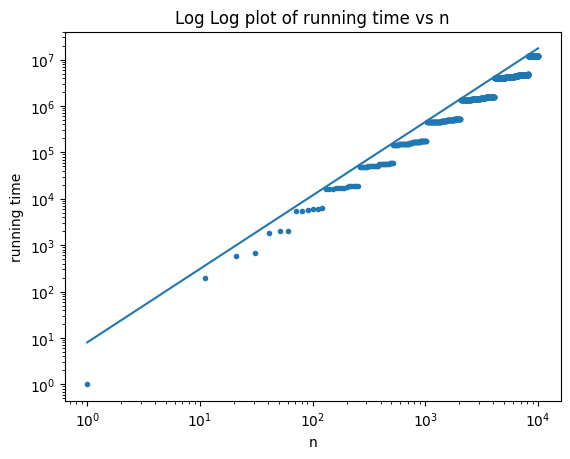

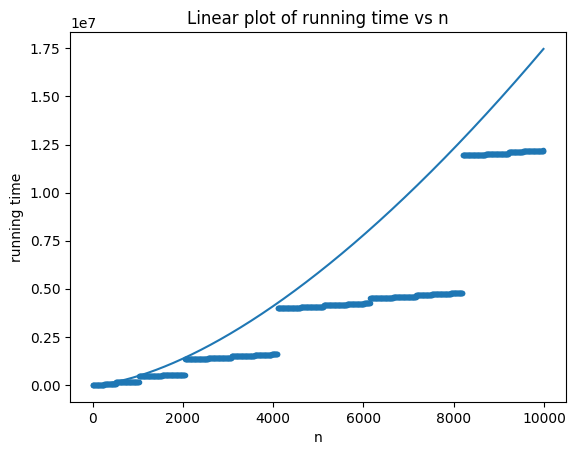

In [122]:
import math
import matplotlib.pyplot as plt

# this code just checks that the value is truly an upper bound

def T(n) -> float:
    if n == 1:
        return 1
    return 3 * T(math.ceil(n/2)) + n

# a = plt.subplot(1,2,1)
ns = range(1,10000, 10)
ts = [T(n) for n in ns]
t2s = [(8*n**math.log(3,2)) for n in ns]

plt.scatter(ns, ts, marker=".")
plt.loglog(ns, t2s)
plt.xlabel("n")
plt.ylabel("running time")
plt.title("Log Log plot of running time vs n")
# plt.savefig("logplot.png")
plt.show()

plt.scatter(ns, ts, marker=".")
plt.plot(ns, t2s)
plt.xlabel("n")
plt.ylabel("running time")
plt.title("Linear plot of running time vs n")
# plt.savefig("linplot2.png")
plt.show()

***
## Problem 5
Suppose you are given two max-heaps, one of size $m$ and one of size $n$. Design an efficient
algorithm to merge them. \
(Hint, your target running time should be $O(m + n)$ and you should
review the construction of heaps.)

So I spent a long time trying to figure out why constructing a heap is $O(n)$ and not $O(n \log{n})$ so here is what I found. We start by taking an array and just calling it a binary tree where the first element is the root, the next two elements are the leafs of the root, the next two are the leafs of the first leaf, the next two are the leafs of the second leaf, and so on. Next we want to make that binary tree a max heap. To do this we can recursively define a $T(n)$ it will take to acomplish this. In a heap of size 0 we know that there is nothing to do at all, so $T(0) = 0$, which can be our base case for later. \
\
Next I want to define heapify. If you apply heapify to a node that has two children smaller than itself, then heapify ends right there. If a child is larger than the parent then we swap the parent and largest child node, then apply heapify to the child tree that we just swapped the old parent into. In the worse case this could run to the very bottom of the original tree, which is  $ \lfloor \log_2{n} \rfloor = O(\log{n})$. The floor function is there because we will swap no more than the number of levels **under** the root node.

Now, if we have a heap of sixe $n$ we will want to heapify that root, which will take $\lfloor \log_2{n} \rfloor$ (notice that $\log_2{1} = 0$). Before we heapify that node we will actually want to apply this to both child nodes since we are recursively going up out heap. This means $T(n) = 2T(\frac{n}{2}) + \lfloor \log_2{n} \rfloor$. I will now just use $\log_2{n}$. Lets see what this equals to.
$$ T(n) $$
$$ 2T(\frac{n}{2}) + \log_2{n} $$
$$ 2(2T(\frac{n}{4}) + \log_2{\frac{n}{2}}) + \log_2{n} $$
$$ 4T(\frac{n}{4}) + 2\log_2{\frac{n}{2}} + \log_2{n} $$
$$ 4(T(\frac{n}{8}) + \log_2{\frac{n}{4}}) + 2\log_2{\frac{n}{2}} + \log_2{n} $$
$$ 4T(\frac{n}{8}) + 4\log_2{\frac{n}{4}} + 2\log_2{\frac{n}{2}} + \log_2{n} $$
$$ ... $$
$$ 2^{\log_2{n}}T(0) + 2^{\log_2{n}} \log_2{\frac{n}{2^{\log_2{n}}}} + ... + 2 \log_2{\frac{n}{2}} + \log_2{n} $$
$$ 0 + \sum_{i=0}^{ \log_2n } 2^i \log_2{\frac{n}{2^i}} $$
$$ \sum_{i=0}^{ \log_2n } 2^i [\log_2{n} - \log_2{2^i}] $$
$$ \sum_{i=0}^{ \log_2n } 2^i [\log_2{n} - i] $$
$$ \sum_{i= \log_2n }^{0} 2^i [\log_2{n} - i] $$
$$ \sum_{i=0}^{-\log_2n} 2^{i+\log_2n} [\log_2{n} - \log_2{n} - i] $$
$$ \sum_{i=0}^{\log_2n} \frac{n}{2^{i}} i $$
$$ n \sum_{i=0}^{\log_2n} \frac{i}{2^{i}} $$
The sum $ \sum_{i=0}^{\infin} \frac{i}{2^{i}} $ converges, which leaves us with $O(n)$.\
In complete honesty that took me so long to do and was not worth it, but now I can confidently answer the actual question.

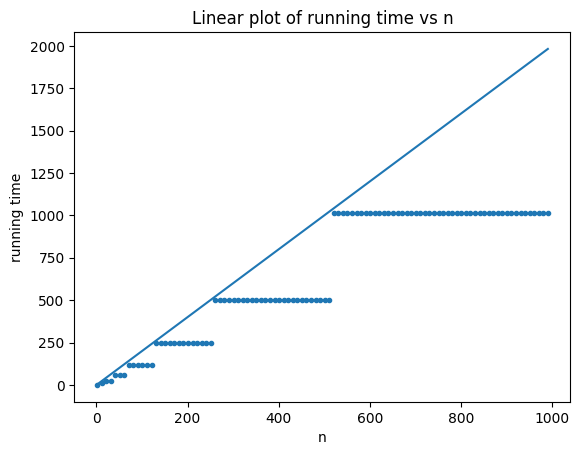

In [96]:
import math
import matplotlib.pyplot as plt

def T(n:int) -> int:
    if n == 0:
        return 0
    return 2*T(n//2) + math.floor(math.log2(n))

ns = range(1,1000, 10)
ts = [T(n) for n in ns]
t2s = [(2*n) for n in ns]

plt.scatter(ns, ts, marker=".")
plt.plot(ns, t2s)
plt.xlabel("n")
plt.ylabel("running time")
plt.title("Linear plot of running time vs n")
plt.show()

All that said might have been a little overkill. For the specific case of merging two heaps, since heaps are just stored as arrays, we can treat the two arrays as one array where the second jsut continues from where the first leaves off and make a heap like normal. We don't even have to take advantage of the pre-existing structure to reach our goal. Since we are essentially treating the two heaps as a single array of length $m+n$ the heap construction will be $O(m+n)$. 

```js
function heapify(heap: array representing a heap, i: index in heap that will act as the root of the heap being heapified){
    compare root and 2 children // child 1 at i2 + 1 and child 2 at i2 + 2
    if root is largest:
        return
    if child 1 is largest:
        swap child 1 and root
        heapify(heap, i*2 + 1)
    if child 2 is largest:
        swap child 2 and root
        heapify(heap, i*2 + 2)
}

function merge_heaps(heap_1: size m heap stored in array, heap_2: size n heap stored in array){
    merged_heap = merge the two arrays via some pointer, when an index 0 to m-1 is called apply it to heap_1, 
                                               when an index m to n-1 is called apply it minus m to heap_2
    for i = (m + n)/2 - 1 to 0: // everything after ((m + n)/2 - 1) will be leafs which don't need heapified
        heapify(merged_heap, i)
}
```

***
## Problem 6
Suppose that you are given k sorted sequences, the total number of elements between all arrays is n. In a brute force manner, we can
merge these k sequences in $O(nk)$ time. Can you design a more efficient merge algorithm with
a running time of $O(nlog(k))$?

The naive algorithm is to look at the fist element in each array, find the smallest, and pop that element, then repead for all n elements. Since the min search is $O(k)$ and we do it for each element n that becomes $O(nk)$.\
\
The reason that this is not optimal is because each time we sort to find the smallest element, then we add a new element and searching from scratch again. We are losing the work we did to sort the elements. Instead we can keep the structure we gain from sorting once by using a priority queue heap. \
\
We will create a heap out of the first element in each sorted array, keeping track of where each element came from. This takes $O(k)$ time. Then we will pop the top element in $O(1)$ time then take the top element from the array that element originally came from and add it to the heap, which takes $O(\log{k})$ time with a good implementation of heapify. We repeat for all n elements, $O(n)$. Overall this gives us a running time of:

$$ O(k) + O(\log{k}) * O(n) = O(n\log{k}) $$

```js
function Merge_k_Arrays(arrays: k arrays of sorted elements, n: number of total elements) {
    heap = pop from each array and make a heap, store where the elements came from; // O(k)
    result = array of length n;
    for 1 to n: // O(n)
        pop root from the heap and put it in the next spot in the array // O(1)
        add the next element from the array that the last element popped from heap was originally from
        heapify heap // O(log k)
    return result
}
```

***
## Problem 7
You are given an array of n real numbers and asked to sort the numbers. The twist here is that
many elements have duplicates and there are only $k << n$ distinct numbers. Argue which sorting
algorithm (heap sort, BST sort, insertion sort, merge sort, etc) is best suited for the problem,
i.e., with the best asymptotic running time.

If $k<<n$ then we can use counting sort. We can track the number of times an element is present in some structure, and just use that structure that keeps track of the number of elements to make a sorted array later. We can store the count of each element in a binary search tree (BST). Each time we see an element we go to the BST and either find the element and increment the counter or find the spot that element should be and add it with a counter starting at 1 (both of these actions are $O(k)$ time since the tree will have at most $k$ different elements). We do this for $n$ elements which gives us an upper bound of $O(nk)$ for building the full BST.\
\
The next step is to turn the BST into a sorted array. We go to the smallest element then add it to the front of an array for the number of times the counter says it was seen. Then we go to the next smallest element and repeat, appending to the end of the new array. Since we have to add all $n$ elements back there will be $n$ additions to the new array, and each element takes at most $O(k)$ time to find which gives us total $O(nk)$ time to make the array. Since both steps take $O(nk)$ to complete that puts it as the overall upper bound.\
\
This means that this search is faster than a regular comparison sort method when $k < \log_2{n}$. 

***
## Problem 8
Given an array $A[1..n]$ of $n$ integers, such that for all $j, 1 ≤ j < n, |A[j] −A[j + 1]| ≤ 1$. \
Let $A[1] = x$ and $A[n] = y$, such that $x < y$. 
Design an efficient search algorithm to find j such that
$A[j] = z$ for a given value $z, x ≤z ≤y$.

In english terms, the constraint on the array is that any element will differ from the elements on the left and right by either 1 or 0 (where $x$ and $y$ which only have one neighboring element each). A graph like this might look like this.

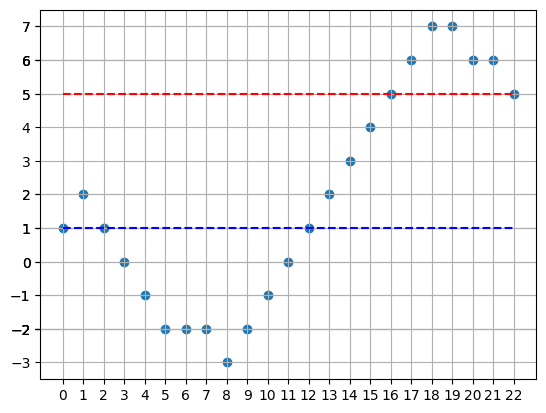

In [83]:
import matplotlib.pyplot as plt

y = [1, 2, 1, 0, -1, -2, -2, -2, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 7, 6, 6, 5]
x = range(len(y))

plt.hlines([y[0], y[-1]], x[0], x[-1], ["blue", 'red'], 'dashed')
plt.scatter(x, y)
plt.xticks(x)
plt.yticks(y)
plt.grid()
plt.show()

We can take advantage of the way this is structured to make a fast algorithm. We can essentially use a discrete version of the `intemidiate value theorem` since we know that to go from a height of $n$ to $n+2$ we must cross $n+1$ (the same will be true for going from $n+2$ to $n$ since we must either go up 1, down 1, or stay constant). Knowing this we can say with confidence that to go from height $x$ to height $y$ we must at some point cross the number $z$ if $x \leq z \leq y$. \
\
If we first look at the number $q = A[\frac{n}{2}]$ (halfway between $x$ and $y$). If $ q = z$ then we have our answer, but chances are we aren't that lucky. Next we can decide if $z$ is closer to $x$ or $y$ by checking if $ z \in [x,q) \cap \mathbb{Z} $. If it is then we know that the location of $z$ is in the range $[0,\frac{n}{2})$. If $z$ is not between $x$ and $q$ then we know it will be between $q$ and $y$, so its location is in the range 
$(\frac{n}{2}, n]$. Then we just repeat this step in the new range we want, which is just binary search. Here is some psuedo code for this algorithm. 

```js
function find_z(A: array of integers as desribed above, z: element in A we are searching for) {
    x = A[0]
    x_index = 0
    y = A[length of A - 1]
    y_index = length of A - 1
    while q != z: // we cut the amount of A down by half every loop so this is O(log n)
        midpoint = (x_index + y_index)/2 // integer division
        q = A[midpoint]
        if q = z:
            return midpoint
        if z is between x and q:
            y = midpoint
        if z id between q and y:
            x = midpoint
    return q
}
```
As a note there is a chance that after you look at a midpoint, $z$ could be between both sides. This just means there must be two $z$s and it does not matter which side you choose, since the requirements do not specify a certain $z$ we need to find, just a $z$.

***
## Problem 9
The input is a permutation of a set of $n$ numbers in an array $A[1..n]$ with the permutation $σ$
specified. Design an $Θ (n \log{n})$ algorithm to order the numbers in $A$ according to the permutation
$(1, 2, 3, ..., n)$ without using more than constant additional space.
For example, if \
`A = {10.5, 9.3, 2.7, 13.6}` and \
`σ = {4, 2, 3, 1}`, then the output should be \
`A = {13.6, 9.3, 2.7, 10.5}`.

Since we only get constant _**additional**_ time we need to defined what space we start with. We are given $A$ and $\sigma$ as arrays of size $n$, so we can mutate those at will, but $A$ is floats and $\sigma$ is integers so they cannot exchange values between them. One way we can approach this is by noticing we need to get the values of $A$ into the order where $\sigma$ will be ordered. If we sort $\sigma$ and apply all the same changes to $A$ while never using it for comparison, we will get our $A$ sorted to the specification given by $\sigma$. While my favorite sort (merge sort 😍) will give us the correct time complexity, it is not a constant space algorthm. Quick sort can be done in constant space, but does not give a strict bound of $\Theta(n \log{n})$. We can use heap sort since it has a time complexirt of $\Theta(n \log{n})$ and can be implemented with constant space.\
\
To implement this with heap sort you have to first create two max heaps. As you can see in my painful proof in **Problem 5** (or just online like most people) the running time to create a heap from an array is $O(n)$. We will do this normally with the $\sigma$ array, but for the $A$ heap we will just follow all of the exact same swaps as in the $\sigma$ heap construction. We do not use the $A$ values at all for comparisons. This takes only 2 bits of extra space, one slot for the swaping of elements in $\sigma$ and one for the swaping in $A$.\
\
Next we will apply the heap sort part. We want to swap the first element in each array with the last element, decrease the "apparent" length of the array so heapify won't make it to the last element, then heapify at the root. Again when we heapify the $\sigma$ heap we do the exact same operations on the $A$ heap, not using the $A$ elements in the heapify of either heap. Then repeat, building the sorted array from back to front at the end of the array. We do this until the apparent length of the heap is 0, which is $n$ times. Since we call heapify each time, which is $O(\log{n})$ we have a total running time of $O(n \log{n})$ and we only need to use two extra variables for the swapping and maybe a few integers for keeping track, but nothing that scales with $n$. 

```js
function heapify(sigma: main heap, A: heap to just alter and not compare, i: index of root){
    compare root and 2 children of sigma // child 1 at i2 + 1 and child 2 at i2 + 2
    if root is largest:
        return
    if child 1 is largest:
        swap child 1 and root in sigma
        swap child 1 and root in A
        heapify(heap, A, i*2 + 1)
    if child 2 is largest:
        swap child 2 and root in sigma
        swap child 2 and root in A
        heapify(heap, A, i*2 + 2)
}

function build_heap(sigma: array to use for comparisons, A: array to alter but not use for compare){
    for i = (length of sigma)/2 - 1 to 0: // everything after ((m + n)/2 - 1) will be leafs which don't need heapified
        heapify(sigma, A, i)
}

function permutate(A: array, sigma: array representing permutation){
    sigma = build_heap(sigma, A)
    heapsort sigma using the heapify() fn above and pulling the top element of A to the back after
        each iteration too
    return A
}
```

***
## Problem 10 
Consider the following instance of the knapsack problem. Let the knapsack size be $K = 14$. There
are $n = 6$ items. Each item is represented by a pair of integers, where the first integer indicates its
size and the Second integer indicates its value. \
Here are the items: $(6,5),(4,3),(2,1),(7,3),(4,10),(12,6)$. \
Build the dynamic programming table to solve the following two problems:\
(a) Find a subset of items whose total size is $\leq K$, and whose total value is maximized.\
(b) Is there a subset of items whose total size is exactly $K$?

In [106]:
# part A
import numpy as np
from tabulate import tabulate

def ks_table(K:int, n:int, items:list[tuple[int, int]]) -> np.ndarray:
    """
    creates the table for a dp knapsack implementation

    items are in form (weight, value)
    """
    t = np.zeros([n, K+1])
    for w in range(K+1):
        if w - items[0][0] >= 0:
            t[0, w] = items[0][1]
    for i, item in enumerate(items[1:]):
        i+=1
        for w in range(K+1):
            if w-item[0] >= 0:
                a = max(t[i-1, w-item[0]] + item[1], t[i-1, w]) 
            else:
                a = t[i-1, w]
            t[i, w] = a
    titles = ["item\K"] + [x for x in range(K+1)]
    print(tabulate(t,tablefmt="fancy_grid", headers=titles, showindex=[f"Item {x}" for x in range(n)]))

ks_table(14, 6, [(6,5),(4,3),(2,1),(7,3),(4,10),(12,6)])

╒══════════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╕
│ item\K   │   0 │   1 │   2 │   3 │   4 │   5 │   6 │   7 │   8 │   9 │   10 │   11 │   12 │   13 │   14 │
╞══════════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╡
│ Item 0   │   0 │   0 │   0 │   0 │   0 │   0 │   5 │   5 │   5 │   5 │    5 │    5 │    5 │    5 │    5 │
├──────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼──────┼──────┤
│ Item 1   │   0 │   0 │   0 │   0 │   3 │   3 │   5 │   5 │   5 │   5 │    8 │    8 │    8 │    8 │    8 │
├──────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼──────┼──────┤
│ Item 2   │   0 │   0 │   1 │   1 │   3 │   3 │   5 │   5 │   6 │   6 │    8 │    8 │    9 │    9 │    9 │
├──────────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼──────┼──────┤
│ Item 3   │   0 │   0 │   1

In [107]:
# part B
import numpy as np
from tabulate import tabulate

def ks_table(K:int, n:int, items:list[tuple[int, int]]) -> np.ndarray:
    """
    creates the table for a dp knapsack implementation

    items are in form (weight, value)
    """
    t = np.zeros([n, K+1]) + -np.inf
    t[0,0] = 0
    for w in range(1,K+1): # first row
        if w == items[0][0]:
            t[0, w] = items[0][1]
    for i, item in enumerate(items[1:], 1):
        for w in range(K+1):
            if w - item[0] >= 0:
                a = max(t[i-1, w-item[0]] + item[1], t[i-1, w]) 
            else:
                a = t[i-1, w]
            t[i, w] = a
    titles = ["item\K"] + [x for x in range(K+1)]
    print(tabulate(t,tablefmt="fancy_grid", headers=titles, showindex=[f"Item {x}" for x in range(n)]))

ks_table(14, 6, [(6,5),(4,3),(2,1),(7,3),(4,10),(12,6)])

╒══════════╤═════╤══════╤══════╤══════╤══════╤══════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ item\K   │   0 │    1 │    2 │    3 │    4 │    5 │   6 │    7 │    8 │    9 │   10 │   11 │   12 │   13 │   14 │
╞══════════╪═════╪══════╪══════╪══════╪══════╪══════╪═════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ Item 0   │   0 │ -inf │ -inf │ -inf │ -inf │ -inf │   5 │ -inf │ -inf │ -inf │ -inf │ -inf │ -inf │ -inf │ -inf │
├──────────┼─────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Item 1   │   0 │ -inf │ -inf │ -inf │    3 │ -inf │   5 │ -inf │ -inf │ -inf │    8 │ -inf │ -inf │ -inf │ -inf │
├──────────┼─────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Item 2   │   0 │ -inf │    1 │ -inf │    3 │ -inf │   5 │ -inf │    6 │ -inf │    8 │ -inf │    9 │ -inf │ -inf │
├──────────┼─────┼──────┼──────┼──────┼──────┼──────┼─────┼──────┼──────

(a) We can see that with all six items and a size of 14 the maximum value that you can hold is 18\
\
(b) The best case is the same when you have to fill the bag, but there are many opetions that are worse or not possible. One interesting one is the case of a $K=13$ knapsac now being worse than a $K=12$. All the `-inf` elements are the cases that do not have a combination of elements that can fill the knapsack represented by that square.

***
## Problem 11
Consider the Knapsack problem as discussed in class. You are given a set of items with a positive
integer size and a positive value, and the goal is to find a sub-set of items to fill up a knapsack
maximizing the total value. For this problem, you are given 2 knapsacks, each of a positive
integer size $K$. Design an algorithm to find a subset of items to fill up the two knapsacks,
maximizing the total value.

So this changes the recursive way we want to think about the problem, but only a little. Normally we have to choices when we encounter an item:
1. Put the item in the knapsack
2. Do not put the item in the knapsac

However with two knapsacks we have a different set of choices:
1. Put the item in knapsack 1
2. Put the item in knapsack 2
3. Do not put the item in either knapsack

This means we change our answer to 
$ks(I_n, k_1, k_2) = \max\{ks(I_{n-1}, k_1 - W_n, k_2) + V_n, ks(i-1, k_1, k_2- W_n) + V_n, ks(i-1, k_1, k_2)\}$.
Instead of a table we will need a 3-dimentional matrix to store all the steps.

```js
function double_knapsack(k1: size of knapsack 1, k2: size of knapsack 2, N: number of items, items: set of items){
    matrix = create a (k1+1) x (k2+1) x N matrix
    for every size m from 0 to k1 and every size n 0 to k2:
        if the weight of the first item is less than or equal to either knapsack:
            matrix[1, m, n] = value of item 1
    for i from 2 to N, every size m from 0 to k1, and every size n 0 to k2::
        matrix[i, m, n] = max between the three options listed above
    return the final element in the matrix
}
```

In [110]:
import numpy as np
from tabulate import tabulate

def ks_table(K1:int, K2:int, n:int, items:list[tuple[int, int]]) -> int:
    """
    creates the table for a dp knapsack implementation

    items are in form (weight, value)
    """
    t = np.zeros([n, K1+1, K2+1])
    item0 = items[0]
    for w1 in range(K1+1):
        for w2 in range(K2+1):
            c1 = c2 = -np.inf
            if w1 >= item0[0]:
                c1 = item0[1]
            if w2 >= item0[0]:
                c2 = item0[1]
            t[0, w1, w2] = max(c1, c2, 0)

    for i, item in enumerate(items[1:], start=1):
        for w1 in range(K1+1):
            for w2 in range(K2+1):
                c1 = c2 = -np.inf
                if w1 >= item[0]:
                    c1 = t[i-1, w1-item[0], w2] + item[1]
                if w2 >= item[0]:
                    c2 = t[i-1, w1, w2-item[0]] + item[1]
                t[i, w1, w2] = max(c1, c2, t[i-1, w1, w2])

    return t[n-1, K1, K2] # last element in t
    
print(ks_table(7, 7, 6, [(6,5),(4,3),(2,1),(7,3),(4,10),(12,6)]))


16.0
